<a href="https://colab.research.google.com/github/degalavarsha/Stockprice_prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lstm a recuurent neural network
#import libraries
import math
import pandas_datareader as data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf

# get stock data
df = yf.download('AAPL', start='2020-01-01', end='2024-12-17')
# show the data
print(df)


/tmp/ipython-input-1768062070.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2024-12-17')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.538528   72.598907   71.292319   71.545905  135480400
2020-01-03   71.833282   72.594048   71.608677   71.765659  146322800
2020-01-06   72.405678   72.444321   70.703012   70.954188  118387200
2020-01-07   72.065155   72.671348   71.845377   72.415345  108872000
2020-01-08   73.224396   73.526287   71.768071   71.768071  132079200
...                ...         ...         ...         ...        ...
2024-12-10  246.893555  247.332001  244.472143  246.016663   36914800
2024-12-11  245.618088  249.912839  245.388890  247.082889   45205800
2024-12-12  247.082886  247.860125  244.810937  246.016663   32777500
2024-12-13  247.252274  248.408159  245.368960  246.943373   33155300
2024-12-16  250.151978  250.490786  246.773970  247.112779   51694800

[1248 rows x 5 colu

In [3]:
df.shape

(1248, 5)

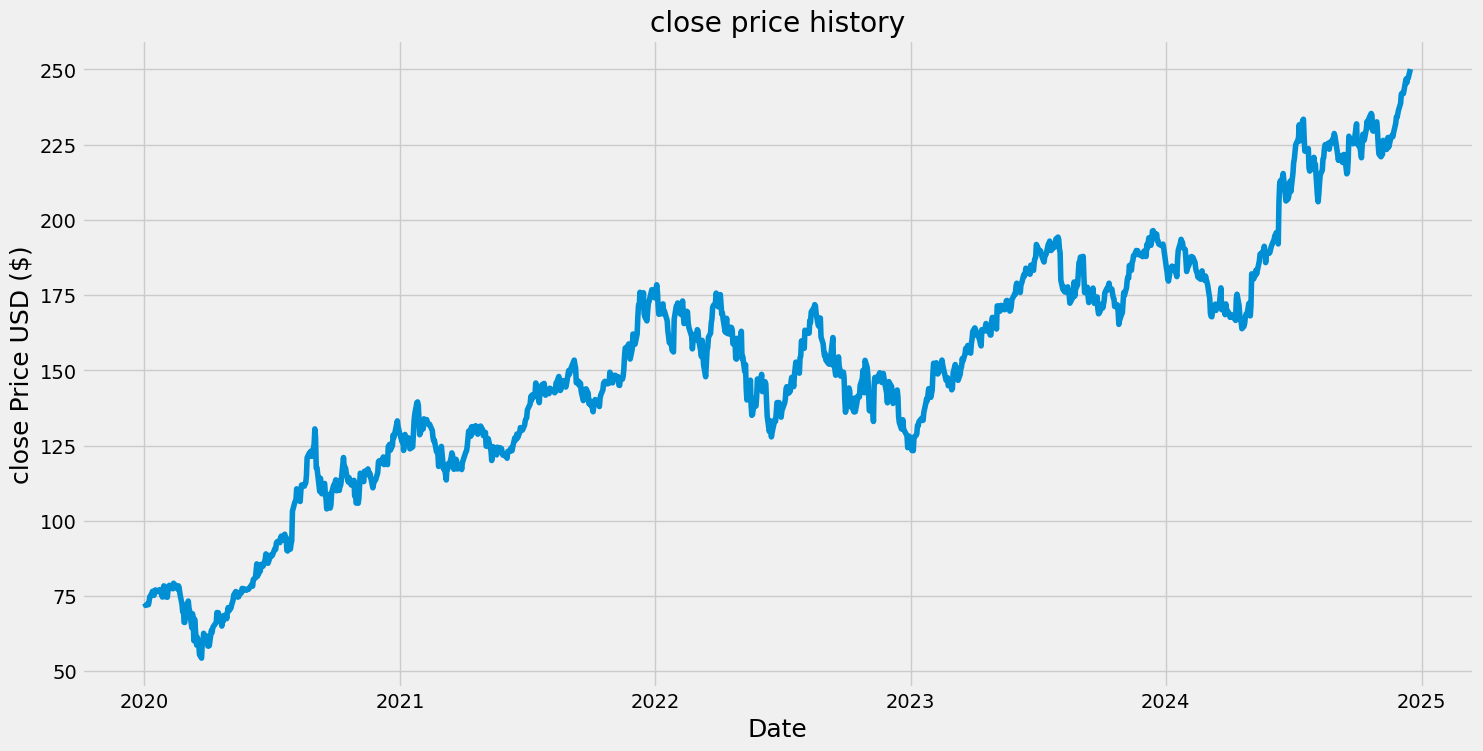

In [4]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#create a new dataframe with only the close column
data=df[['Close']]
#convert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8) #round off math.ceil

training_data_len

999

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.09304562]
 [0.08944439]
 [0.09236724]
 ...
 [0.98432818]
 [0.98519313]
 [1.        ]]


In [7]:
#create the training dataset
#create the scaled training data set
train_data=scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.09304562, 0.08944439, 0.09236724, 0.09062841, 0.09654789,
       0.10449004, 0.10535323, 0.11352976, 0.1082515 , 0.10659893,
       0.1114086 , 0.11571271, 0.11304882, 0.11444247, 0.11632926,
       0.11519468, 0.10365142, 0.11443004, 0.12263119, 0.12205157,
       0.10434215, 0.10329394, 0.11586059, 0.11906713, 0.12370406,
       0.11825263, 0.12013147, 0.11773332, 0.12711587, 0.12423565,
       0.1243346 , 0.11697936, 0.12269041, 0.11858635, 0.10962403,
       0.0912422 , 0.07875673, 0.08440603, 0.06075797, 0.0605603 ,
       0.09202094, 0.08028963, 0.09687907, 0.08473999, 0.07993113,
       0.0516722 , 0.07536955, 0.06311912, 0.02949515, 0.06625904,
       0.02205338, 0.03521869, 0.02756672, 0.02523033, 0.0060202 ,
       0.        , 0.02782633, 0.02614511, 0.04211658, 0.02888947])]
[np.float64(0.03762917028564655)]

[array([0.09304562, 0.08944439, 0.09236724, 0.09062841, 0.09654789,
       0.10449004, 0.10535323, 0.11352976, 0.1082515 , 0.10659893,
       0.1114086 , 0.11

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(939, 60, 1)

In [10]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

939/939 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.0046


In [13]:
#create the testing dataset
#create a new array containing scaled values from index 939 to 1248
test_data=scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [15]:
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [17]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

np.float64(2.6521571515554405)

/tmp/ipython-input-2552943346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


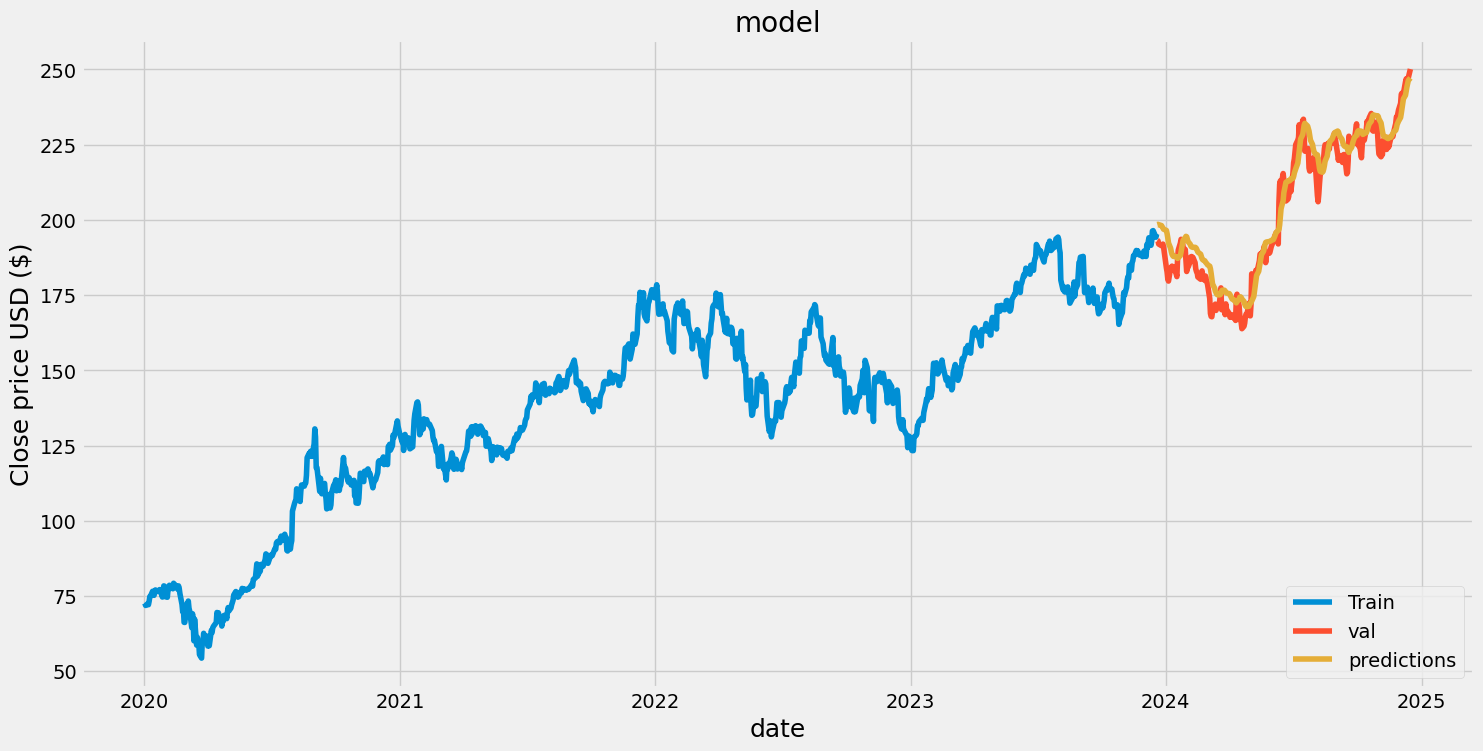

In [18]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val',"predictions"], loc='lower right')
plt.show()

In [19]:
#show the valid and predicted prices
valid

Price,Close,predictions
Ticker,AAPL,
Date,,
2023-12-20,193.194336,198.458313
2023-12-21,193.045609,198.519806
2023-12-22,191.974686,198.417084
2023-12-26,191.429321,198.123703
2023-12-27,191.528442,197.706009
...,...,...
2024-12-10,246.893555,242.830780
2024-12-11,245.618088,244.211655


In [20]:
#get the quote
import yfinance as yf
apple_quote= yf.download('AAPL', start='2020-01-01', end='2024-12-17')
#create a new datafrsme
new_df=apple_quote[['Close']]
#get the last 60day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

/tmp/ipython-input-637765928.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote= yf.download('AAPL', start='2020-01-01', end='2024-12-17')
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[248.19298]]


In [21]:
#get quote
import yfinance as yf
apple_quote2= yf.download('AAPL', start='2024-12-16', end='2024-12-17')
print(apple_quote2['Close'])

/tmp/ipython-input-1638438515.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote2= yf.download('AAPL', start='2024-12-16', end='2024-12-17')
[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2024-12-16  250.151962
